In [1]:
from pandas.tools.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
import re
import os

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style = "white")

In [3]:
with open('accident1L.csv','r') as f:
    acc = pd.read_csv(f,encoding='utf-8',low_memory=False)

In [4]:
acc.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,0,0,7,1,2,0,0,1,1,E01002863


In [5]:
with open('../contextCSVs/Accident_Severity.csv','r') as f1:
    acc_severity = pd.read_csv(f1,encoding='utf-8')
acc_severity 

,code,label
0,1,Fatal
1,2,Serious
2,3,Slight


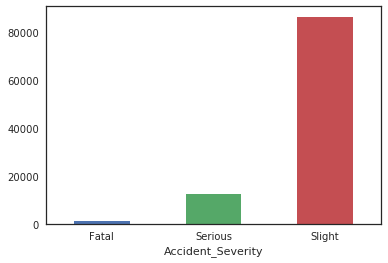

In [6]:
acc_count = (acc.groupby(acc.Accident_Severity).Accident_Severity.count())
acc_count_plot = acc_count.plot(kind = 'bar')
acc_count_plot.set_xticklabels(acc_severity.label,rotation=0)

In [7]:
max(acc.Number_of_Vehicles)

18

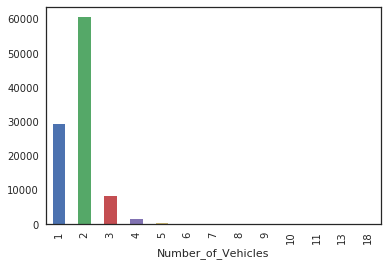

In [8]:
acc_count = acc.groupby(acc.Number_of_Vehicles).Accident_Severity.count()
acc_count.plot(kind = 'bar')

In [9]:
with open('../contextCSVs/Light_Conditions.csv','r') as f2:
    light_conditions = pd.read_csv(f2,encoding='utf-8')
light_conditions    
    

,code,label
0,1,Daylight
1,4,Darkness - lights lit
2,5,Darkness - lights unlit
3,6,Darkness - no lighting
4,7,Darkness - lighting unknown
5,-1,Data missing or out of range


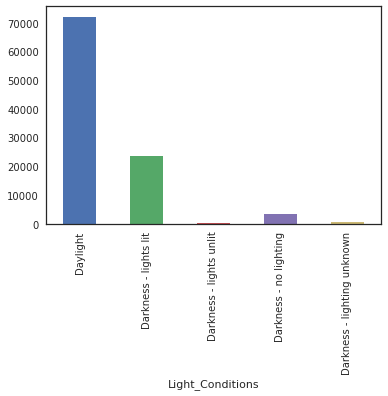

In [10]:
acc_count = acc.groupby(acc.Light_Conditions).Accident_Severity.count()
acc_count_plot = acc_count.plot(kind = 'bar')
acc_count_plot.set_xticklabels(light_conditions.label)

In [11]:
with open('../contextCSVs/Weather_Conditions.csv','r') as f3:
    weather_conditions = pd.read_csv(f3,encoding='utf-8')

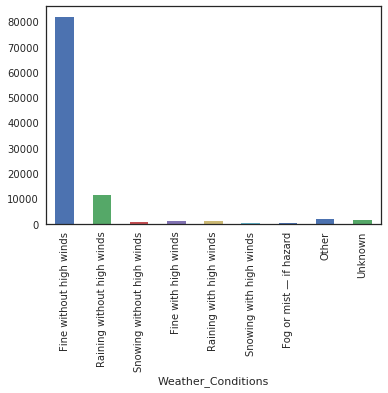

In [12]:
acc_count = acc.groupby(acc.Weather_Conditions).Accident_Severity.count()
acc_count_plot = acc_count.plot(kind = 'bar')
acc_count_plot.set_xticklabels(weather_conditions.label)

In [13]:
with open('../contextCSVs/Road_Surface_Conditions.csv','r') as f4:
    road_surface_conditions = pd.read_csv(f4,encoding='utf-8')

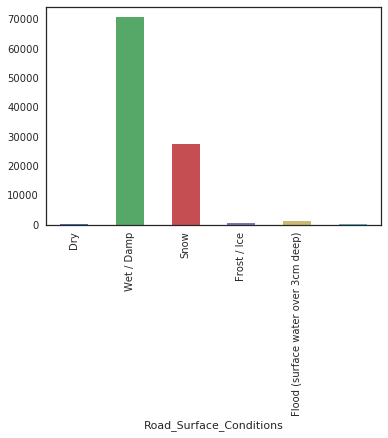

In [14]:
acc_count = acc.groupby(acc.Road_Surface_Conditions).Accident_Severity.count()
acc_count_plot = acc_count.plot(kind = 'bar')
acc_count_plot.set_xticklabels(road_surface_conditions.label)

In [15]:
with open('../contextCSVs/Urban_Rural.csv','r') as f5:
    urban_rural = pd.read_csv(f5,encoding='utf-8')
urban_rural


,code,label
0,1,Urban
1,2,Rural
2,3,Unallocated


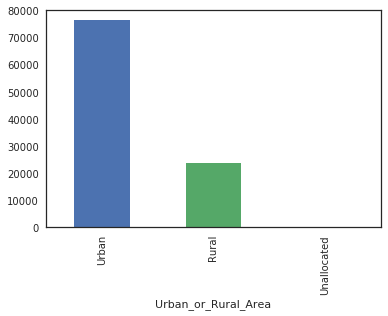

In [16]:
acc_count = acc.groupby(acc.Urban_or_Rural_Area).Accident_Severity.count()
acc_count_plot = acc_count.plot(kind = 'bar')
acc_count_plot.set_xticklabels(urban_rural.label)

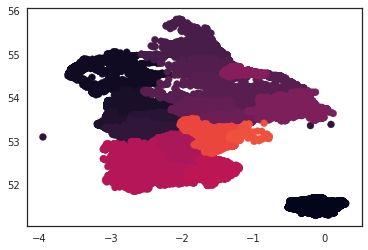

In [17]:
plt.scatter(acc.Longitude,acc.Latitude,c = acc.Police_Force)

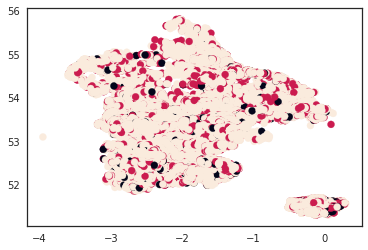

In [18]:
plt.scatter(acc.Longitude,acc.Latitude,c = acc.Accident_Severity)

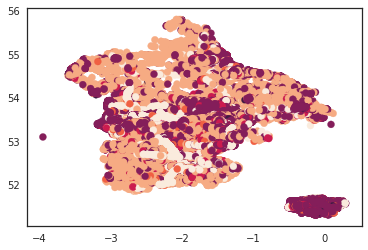

In [19]:
plt.scatter(acc.Longitude,acc.Latitude,c = acc.Speed_limit)

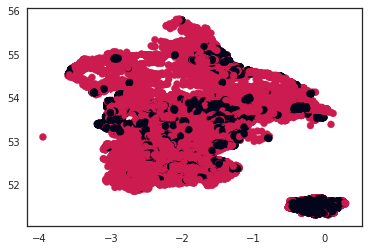

In [20]:
plt.scatter(acc.Longitude,acc.Latitude,c = acc.Urban_or_Rural_Area)

In [21]:
corrmat = acc.corr()

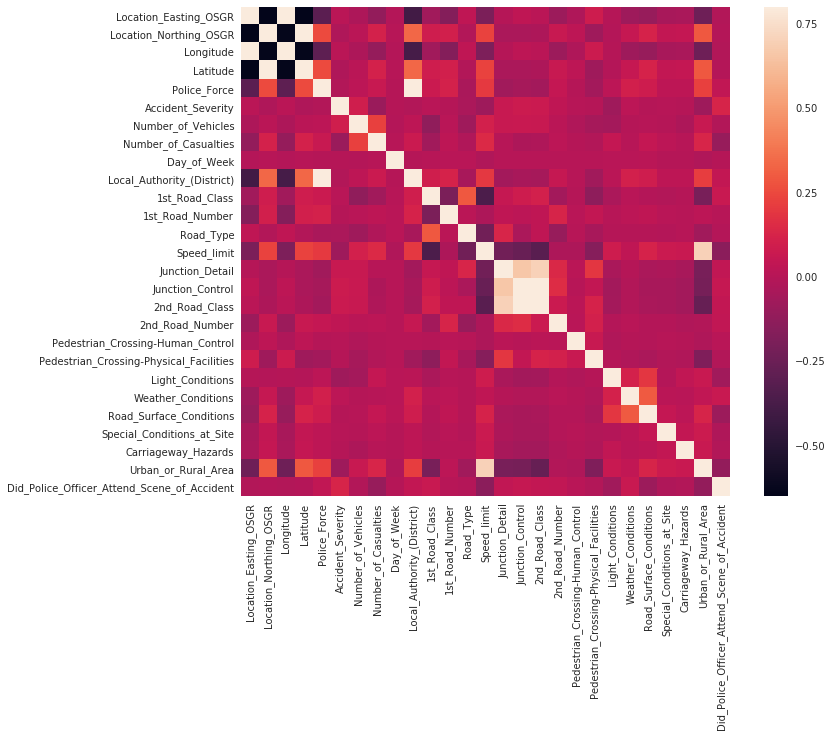

In [22]:
f,ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat,vmax =.8,square = True);

In [23]:
acc.replace([np.inf, -np.inf], np.nan)

acc.dropna(axis=1, how='all')
acc.dropna(axis=0, how='all')
acc["Location_Easting_OSGR"].fillna(acc["Location_Easting_OSGR"].mean(), inplace=True)
acc["Location_Northing_OSGR"].fillna(acc["Location_Northing_OSGR"].mean(), inplace=True)
acc["Longitude"].fillna(acc["Longitude"].mean(), inplace=True)
acc["Latitude"].fillna(acc["Latitude"].mean(), inplace=True)
acc["Police_Force"].fillna(acc["Police_Force"].mean(), inplace=True)

acc["Accident_Severity"].fillna(0, inplace=True)

acc["Number_of_Vehicles"].fillna(acc["Number_of_Vehicles"].mean(), inplace=True)
acc["Number_of_Casualties"].fillna(acc["Number_of_Casualties"].mean(), inplace=True)
acc["Day_of_Week"].fillna(acc["Day_of_Week"].mean(), inplace=True)
acc["Local_Authority_(District)"].fillna(acc["Local_Authority_(District)"].mean(), inplace=True)

acc["1st_Road_Class"].fillna(acc["1st_Road_Class"].mean(), inplace=True)
acc["1st_Road_Number"].fillna(acc["1st_Road_Number"].mean(), inplace=True)
acc["Road_Type"].fillna(acc["Road_Type"].mean(), inplace=True)
acc["Speed_limit"].fillna(acc["Speed_limit"].mean(), inplace=True)
acc["Junction_Detail"].fillna(acc["Junction_Detail"].mean(), inplace=True)

acc["Junction_Control"].fillna(acc["Junction_Control"].mean(), inplace=True)
acc["2nd_Road_Class"].fillna(acc["2nd_Road_Class"].mean(), inplace=True)
acc["2nd_Road_Number"].fillna(acc["2nd_Road_Number"].mean(), inplace=True)
acc["Pedestrian_Crossing-Human_Control"].fillna(acc["Pedestrian_Crossing-Human_Control"].mean(), inplace=True)
acc["Pedestrian_Crossing-Physical_Facilities"].fillna(acc["Pedestrian_Crossing-Physical_Facilities"].mean(), inplace=True)

acc["Light_Conditions"].fillna(acc["Light_Conditions"].mean(), inplace=True)
acc["Weather_Conditions"].fillna(acc["Weather_Conditions"].mean(), inplace=True)
acc["Road_Surface_Conditions"].fillna(acc["Road_Surface_Conditions"].mean(), inplace=True)
acc["Special_Conditions_at_Site"].fillna(acc["Special_Conditions_at_Site"].mean(), inplace=True)
acc["Carriageway_Hazards"].fillna(acc["Carriageway_Hazards"].mean(), inplace=True)

acc["Urban_or_Rural_Area"].fillna(acc["Urban_or_Rural_Area"].mean(), inplace=True)
acc["Did_Police_Officer_Attend_Scene_of_Accident"].fillna(acc["Did_Police_Officer_Attend_Scene_of_Accident"].mean(), inplace=True)

acc["Date"] = pd.to_datetime(acc["Date"])
acc["Date"] = pd.to_numeric(acc["Date"])

acc["Time"] = pd.to_datetime(acc["Time"])
acc["Time"] = pd.to_numeric(acc["Time"])

acc["Date"].fillna(acc["Date"].mean(), inplace=True)
acc["Time"].fillna(acc["Time"].mean(), inplace=True)

acc.fillna(0)

array = acc.values

array = np.asarray(array)
np.random.shuffle(array)

test_index = round((80.0/100)*(array.shape[0]))

print test_index
print array.shape[0]

79999.0
99999


In [24]:
Y11 = list(acc["Accident_Severity"].values[0:79999])
Y11 = np.asarray(Y11,dtype=np.float128)
X11 = array[0:79999,[1,2,3,4,5,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]]
X11 = np.asarray(X11,dtype=np.float128)

X_test = array[80000:99999,[1,2,3,4,5,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]]
X_test = np.asarray(X_test,dtype=np.float128)
Y_test = list(acc["Accident_Severity"].values[80000:99999])
Y_test = np.asarray(Y_test,dtype=np.float128)

In [25]:
X11 = normalize(X11)
X_test = normalize(X_test)

/home/navya/.local/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype float128 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


In [26]:
def sigmoid(scores):
    scoressig =  1 / (1 + np.exp(-scores))
    return scoressig

In [27]:
def hypothesis(w,X,b):
    Z = np.dot(w,X.T) + b
    Z = sigmoid(Z)
    return Z

In [28]:
def thetaVal(w,b,X,alpha,Y11):
    for i in range(1,100):
        Z = np.dot(w,X.T)+b
        A = sigmoid(Z)
        dZ = A - Y11
        dw = (np.dot(dZ,X))/100
        db = (np.sum(dZ))/100
        w = w - alpha*dw
        b = b - alpha*db
    return w,b    
        

In [29]:
def maximumValue( x, y, z ):
    maximum = x
    if y > maximum:
        maximum = y
    if z > maximum:
        maximum = z
    return maximum    

In [30]:
w1 = np.ones(X11.shape[1])[np.newaxis]
w2 = np.ones(X11.shape[1])[np.newaxis]
w3 = np.ones(X11.shape[1])[np.newaxis]

print Y11.shape
print w1.shape
Y12 = np.zeros(Y11.shape)

#w1
for i in range (0,Y11.shape[0]):
    if (Y11[i] == 2.0 or Y11[i] == 3.0):
        Y12[i] = 0
    elif Y11[i] == 1.0:
        Y12[i] = 1
        
[w1,b1] = thetaVal(w1,1,X11,0.01,Y12)
print w1
print b1

#w2
for i in range (0,Y11.shape[0]):
    if (Y11[i] == 1.0 or Y11[i] == 3.0):
        Y12[i] = 0
    elif Y11[i] == 2.0:
        Y12[i] = 1
        
[w2,b2] = thetaVal(w2,1,X11,0.01,Y12)
print w2
print b2

#w3
for i in range (0,Y11.shape[0]):
    if (Y11[i] == 2.0 or Y11[i] == 1.0):
        Y12[i] = 0
    elif Y11[i] == 3.0:
        Y12[i] = 1
[w3,b3] = thetaVal(w3,1,X11,0.01,Y12)
print w3
print b3


score = 0
for i in range(0,X_test.shape[0]):
    pred1 = hypothesis(w1,X_test[i],b1)
    pred2 = hypothesis(w2,X_test[i],b2)
    pred3 = hypothesis(w3,X_test[i],b3)
    pred = maximumValue(pred1,pred2,pred3)
    if pred == pred1:
        if Y_test[i] == 1.0:
            score+=1
    if pred == pred2:
        if Y_test[i] == 2.0:
            score+=1
    if pred == pred3:
        if Y_test[i] == 3.0:
            score+=1        

(79999,)
(1, 28)
[[ 1.          1.          1.          1.          1.          1.
   1.         -1.01645842  1.         -1.76347557  1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.        ]]
-2.4256056643717887
[[ 1.          1.          1.          1.          1.          1.
   1.         -0.2706197   1.         -0.75018665  1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.        ]]
-1.1693553729128947
[[1.        1.        1.        1.        1.        1.        1.
  0.8303343 1.        0.7702673 1.        1.        1.        1.
  1.        1.        1.        1.        1.        1.        1.
  1.        1.        1.        1.        1.        1.        1.       ]]
0.722719281844836


In [31]:
print "Accuracy is",(score*100.0)/X_test.shape[0],"%"        

Accuracy is 86.799339967 %
